# Deep Learning and Neural Network - Question 2
## Arian Firoozi - 810100196
## Arman Majidi - 810100205

![University of Tehran logo](UTLogo\University_of_Tehran_logo.svg "University of Tehran")
![Engineering faculty of University of Tehran logo](UTLogo\Engineering_faculty_University_of_Tehran_logo.png "Engineering faculty")

# Outline
- [ 0 - Packages ](#0)
- [ 1 - Network Design](#1)
- [ 2 - Preprocessing ](#2)
- [ 3 - Training ](#3)
- [ 4 - Results](#4)
- [ 5 - Experiment on Different Learning Rates](#5)

<a name="0"></a>
## 0. Packages
only numpy is used

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<a name="1"></a>
## 1. Design

a simple Neural Network with only 1 hidden layer is designed. for activation we use tanh.

In [3]:
class ANet:
    def __init__(self):
        pass
    def forward(self, x, w1, w2):
        a = np.dot(x, w1)
        z = np.tanh(a)
        y_pred=np.dot(z,w2)

        return z, y_pred
    
    def __tanh_derivative(self, x):
        return 1 - np.tanh(x)**2
    
    def backward(self, x, y, m, iters, lr, test_data):
        w1 = np.random.randn(x.shape[-1], m)
        w2 = np.random.randn(m, 1)

        errors = []
        test_err=[]
        for _ in range(iters):
            z, pred_y = self.forward(x, w1, w2)

            error = pred_y - y

            dw2 = np.dot(z.T, error)
            dw1 = np.dot(x.T, error.dot(w2.T) * self.__tanh_derivative(np.dot(x, w1)))

            w2 -= lr * dw2
            w1 -= lr * dw1

            errors.append(error**2)
            z,pred=self.forward(test_data[:,:-1], w1, w2)
            test_err.append((test_data[:,-1:]-pred)**2)

        return w1, w2, errors, test_err


<a name="2"></a>
## 2. Preprocess
preprocessing is done by downloading and standardizing the test and train data and adding bias to it.

In [4]:
import zipfile
import requests
import io

url = "http://archive.ics.uci.edu/static/public/186/wine+quality.zip"
response = requests.get(url)

with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall("data")

red_wine = np.genfromtxt("data/winequality-red.csv", delimiter=';', skip_header=1)

In [5]:
test_data=red_wine[:red_wine.shape[0]//2]
train_data=red_wine[red_wine.shape[0]//2:]

In [6]:
for i in range(train_data.shape[1]):
    avg = np.average(train_data[:,i])
    std = np.std(train_data[:,i])
    for j in range(train_data.shape[0]):
        train_data[j][i]= (train_data[j][i]-avg)/std
    for j in range(test_data.shape[0]):
        test_data[j][i]= (test_data[j][i]-avg)/std

# add bias
test_data = np.append(np.ones((test_data.shape[0], 1)), test_data, 1)
train_data = np.append(np.ones((train_data.shape[0], 1)), train_data, 1)

<a name="3"></a>
## 3. Training
training is done with common learning rate 0.001 and error is shown below. we we later demonstrate that this learning rate is optimal for this task.

In [ ]:
net = ANet()
w1,w2, err, test_err=net.backward(train_data[:,:-1], train_data[:,-1:], 30, 1000, 0.0001, test_data)

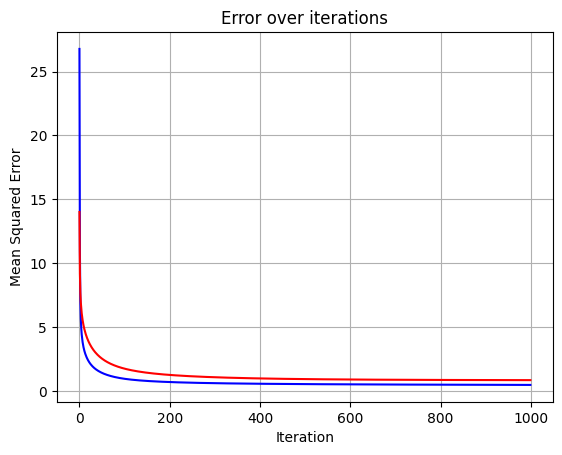

In [20]:
def plot_error(err, test_err):
    plt.plot([np.mean(e) for e in err], color='blue')
    plt.plot([np.mean(e) for e in test_err], color='red')
    plt.title("Error over iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Squared Error")
    plt.grid(True)
    plt.show()
plot_error(err, test_err)

<a name="5"></a>
## 4. Results

In [13]:
z,pred=net.forward(test_data[:,:-1], w1, w2)

In [17]:
error = np.abs(pred - test_data[:,-1:])
print(error)

[[3.86149502e-01]
 [4.11233036e-01]
 [3.59107626e-01]
 [4.90816738e-01]
 [3.86149502e-01]
 [4.74928948e-01]
 [2.43098507e-01]
 [3.03721043e+00]
 [2.18871303e+00]
 [1.27435681e+00]
 [7.21866960e-01]
 [1.27435681e+00]
 [2.49230155e-01]
 [1.39298561e+00]
 [1.47701139e+00]
 [1.44496703e+00]
 [1.44578872e+00]
 [6.38316805e-01]
 [1.04128453e+00]
 [2.03775031e-01]
 [1.16109036e+00]
 [1.43462486e-01]
 [5.77592137e-01]
 [6.03301049e-01]
 [5.90730359e-01]
 [6.64228408e-02]
 [4.28510159e-01]
 [5.77592137e-01]
 [3.36614127e-01]
 [8.71885393e-01]
 [1.88824639e-01]
 [4.16360610e-01]
 [5.47257997e-01]
 [5.83247867e-01]
 [5.28489058e-02]
 [9.59050335e-01]
 [8.75130367e-01]
 [1.24690996e+00]
 [6.01484439e-01]
 [1.06684335e+00]
 [1.06684335e+00]
 [1.81363603e+00]
 [1.01466058e-01]
 [1.18321760e+00]
 [6.81802031e-01]
 [2.72911945e+00]
 [2.12210779e-02]
 [3.33857802e-01]
 [8.43927310e-01]
 [7.58739826e-01]
 [1.41485763e+00]
 [6.05483527e-01]
 [4.32845580e-01]
 [3.45735227e-01]
 [9.52366124e-01]
 [4.726824

<a name="5"></a>
## 5. Experiment on Different Learning Rates

C:\Users\arian\AppData\Local\Temp\ipykernel_17840\3167387175.py:33: RuntimeWarning: overflow encountered in square
  test_err.append((test_data[:,-1:]-pred)**2)
C:\Users\arian\AppData\Local\Temp\ipykernel_17840\3167387175.py:31: RuntimeWarning: overflow encountered in square
  errors.append(error**2)
C:\Users\arian\AppData\Local\Temp\ipykernel_17840\3167387175.py:26: RuntimeWarning: invalid value encountered in multiply
  dw1 = np.dot(x.T, error.dot(w2.T) * self.__tanh_derivative(np.dot(x, w1)))
c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


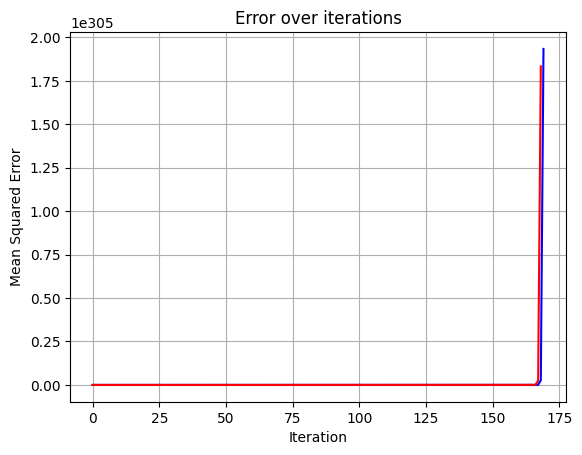

In [21]:
w1,w2, err, test_err=net.backward(train_data[:,:-1], train_data[:,-1:], 30, 1000, 0.001, test_data)
plot_error(err, test_err)

C:\Users\arian\AppData\Local\Temp\ipykernel_17840\3167387175.py:33: RuntimeWarning: overflow encountered in square
  test_err.append((test_data[:,-1:]-pred)**2)
C:\Users\arian\AppData\Local\Temp\ipykernel_17840\3167387175.py:26: RuntimeWarning: invalid value encountered in multiply
  dw1 = np.dot(x.T, error.dot(w2.T) * self.__tanh_derivative(np.dot(x, w1)))
C:\Users\arian\AppData\Local\Temp\ipykernel_17840\3167387175.py:31: RuntimeWarning: overflow encountered in square
  errors.append(error**2)


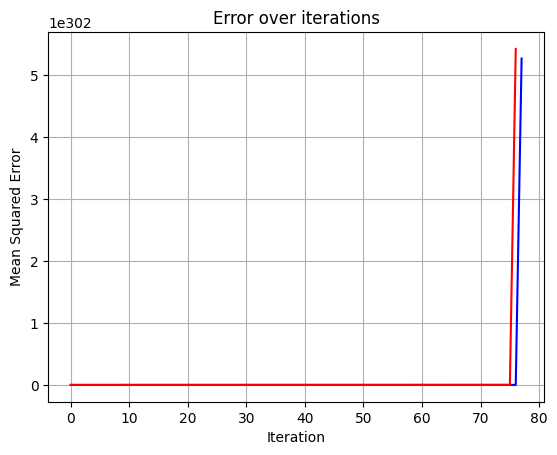

In [25]:
w1,w2, err, test_err=net.backward(train_data[:,:-1], train_data[:,-1:], 30, 1000, 0.01, test_data)
plot_error(err, test_err)

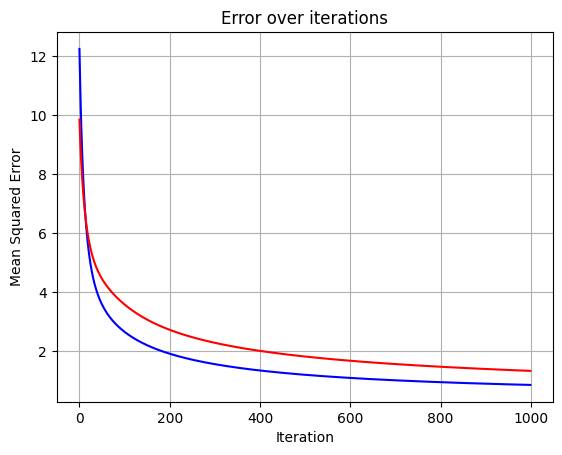

In [30]:
w1,w2, err, test_err=net.backward(train_data[:,:-1], train_data[:,-1:], 30, 1000, 0.00001, test_data)
plot_error(err, test_err)